In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df = pd.read_csv('/content/Google_Stock_Price_Train.csv')

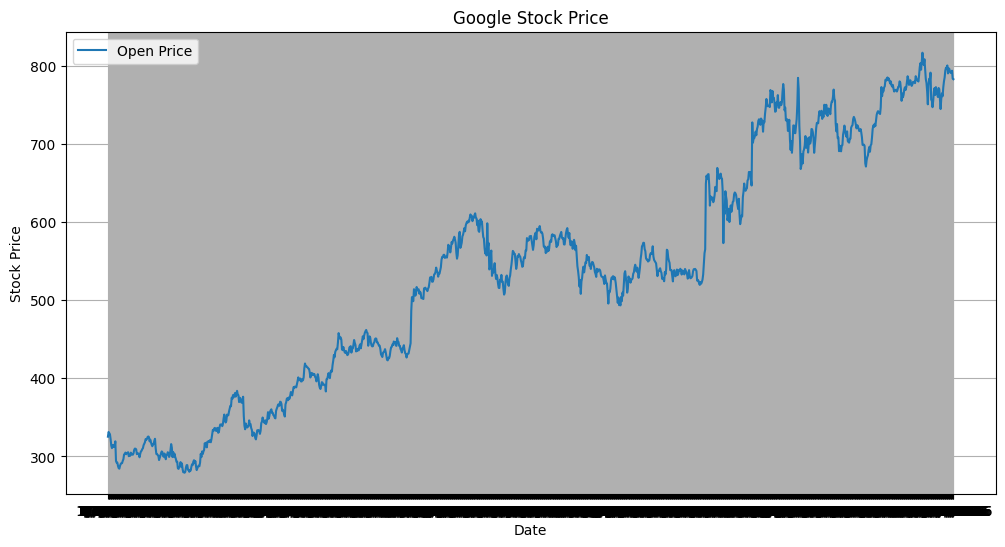

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Google Stock Price')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
data = df['Open'].values.reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)


In [ ]:
look_back = 60
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=10, batch_size=32)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0547
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0018
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.4069e-04
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0012
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0011
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0010
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 9.4552e-04
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 8.8362e-04
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0011
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 8.9328e-04


In [ ]:
predictions = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform([Y_test])

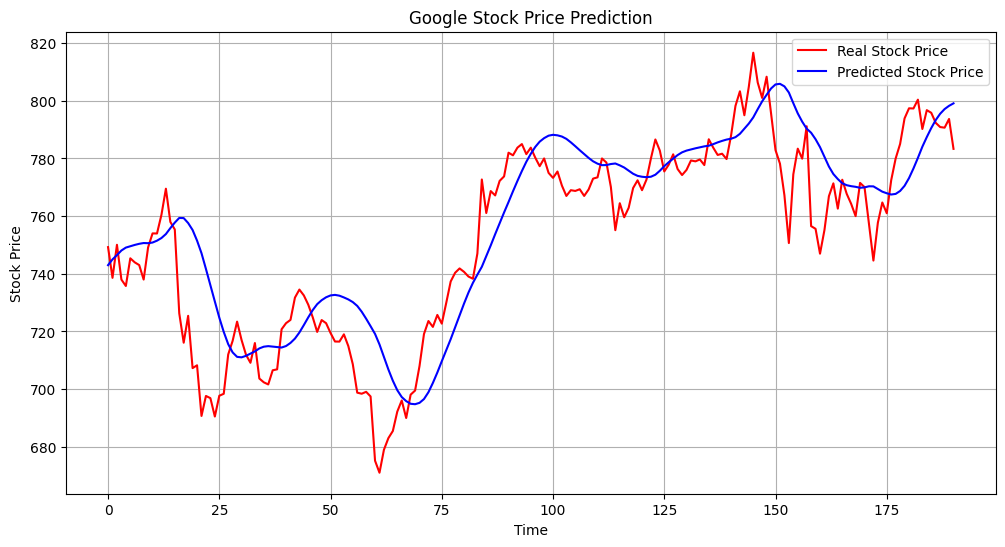

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(Y_test[0], color='red', label='Real Stock Price')
plt.plot(predictions, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
rmse = np.sqrt(np.mean((predictions - Y_test)**2))
print('RMSE:', rmse)

RMSE: 45.84129635805651
